# Steam Reviews 2021

## Table of Contents
<ol>
<li><a href="#intro"><strong>Introduction</strong></a></li>
    <ul>
        <li><a href="#dictionary">Data Dictionary</a></li>
    </ul>
<br>
<li><a href="#intro"><strong>Data Wrangling</strong></a></li>
    <ul>
        <li><a href="#dictionary">Gather</a></li>
    </ul>
    <ul>
        <li><a href="#dictionary">Assess</a></li>
            <ul>
                <li><a href="#dictionary">Quality issues</a></li>
            </ul>
            <ul>
                <li><a href="#dictionary">Tidiness Issues</a></li>
            </ul>
    </ul>
    <ul>
        <li><a href="#dictionary">Clean</a></li>
            <ul>
                <li><a href="#dictionary">Define</a></li>
            </ul>
            <ul>
                <li><a href="#dictionary">Code</a></li>
            </ul>
            <ul>
                <li><a href="#dictionary">Test</a></li>
            </ul>
    </ul>
<br>
<li><a href="#intro"><strong>EDA</strong></a></li>

## 1. Introduction

asdasdadasd

## 2. Data Wrangling
### a) Gathering the Data

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from datetime import datetime

Since the data is already ready on Kaggle and we don't need to scrap it neither download it from Steam API, we will just download it directly from Kaggle.

However, the size of data is 8 gigs so we have to either import only the necessary columns of or load it batch by batch. For the sake of first  exploration, I'll load all attributes except of review attribute which holds the string review of each entry. Such attribute takes so much unecessary storage that we don't need at all.

Now, we can work on just 3 gigs of storage for the entire dataset. After, analyzing the data and define the major issues and clean them. I will work only on the necessary attributes to address each question in our EDA instead of working with the whole data including the unncessary attributes.

I expect to spend a bunch of time analyzing the data and cleaning it properly, and spend much less time covering our EDA.

---

Reading the dataset columns.

In [2]:
cols = list(pd.read_csv("steam_reviews.csv", nrows =1))
print(cols)

['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'author.steamid', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played']


Localizing the index of the review attribute programatically.

In [3]:
review_col_idx = cols.index('review')
review_col_idx

5

Loading all the attributes except for the review in our dataframe.

In [4]:
df = pd.read_csv('steam_reviews.csv', #nrows=5, 
                 usecols=[i for i in range(1, len(cols)) if i!=review_col_idx])

Let's get an idea about the rows, columns, names and length.

In [5]:
df.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access', 'author.steamid',
       'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [6]:
display(df.shape)
display(df.head(2))
df.tail(2)

(21747371, 21)

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,1611381629,1611381629,True,0,0,0.0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,1611381030,1611381030,True,0,0,0.0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09


,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
21747369,546560,Half-Life: Alyx,65645066,english,1584986631,1586382422,True,0,0,0.386022,...,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,1.589715e+09
21747370,546560,Half-Life: Alyx,65644930,schinese,1584986505,1592060800,True,0,0,0.416107,...,True,False,False,76561198116747069,253,7,1062.0,0.0,8.0,1.602858e+09


Let's get an idea about the timestamp.

In [7]:
pd.to_datetime(df.timestamp_updated[:10], origin='unix', unit='s')

0   2021-01-23 06:00:29
1   2021-01-23 05:50:30
2   2021-01-23 05:46:40
3   2021-01-23 05:32:50
4   2021-01-23 05:23:47
5   2021-01-23 05:21:04
6   2021-01-23 05:18:11
7   2021-01-23 05:05:12
8   2021-01-23 04:55:03
9   2021-01-23 04:43:25
Name: timestamp_updated, dtype: datetime64[ns]

Let's display the number of duplicated entries.

In [ ]:
df.duplicated().sum()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-6e764a0154be>", line 1, in <module>
    df.duplicated().sum()
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py", line 5249, in duplicated
    ids = get_group_index(labels, shape, sort=False, xnull=False)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\sorting.py", line 104, in get_group_index
    comp_ids, obs_ids = compress_group_index(out, sort=sort)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\sorting.py", line 533, in compress_group_index
    comp_ids, obs_group_ids = table.get_labels_groupby(group_index)
  File "pandas\_libs\hashtable_class_helper.pxi", line 1326, in pandas._libs.hashtable.Int64HashTable.get_labels_groupby
  File "C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-6e764a0154be>", line 1, in <module>
    df.duplicated().sum()
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py", line 5249, in duplicated
    ids = get_group_index(labels, shape, sort=False, xnull=False)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\sorting.py", line 104, in get_group_index
    comp_ids, obs_ids = compress_group_index(out, sort=sort)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\sorting.py", line 533, in compress_group_index
    comp_ids, obs_group_ids = table.get_labels_groupby(group_index)
  File "pandas\_libs\hashtable_class_helper.pxi", line 1326, in pandas._libs.hashtable.Int64HashTable.get_labels_groupby
  File "C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py", line 14, 

Let's make sure that there are no more duplicated entries by review_id.

In [8]:
df.review_id.duplicated().sum()

ERROR! Session/line number was not unique in database. History logging moved to new session 354


KeyboardInterrupt: 

In [ ]:
(df.duplicated() != df.review_id.duplicated()).sum()

Well, then the duplicated entries are already duplicated by review_id so we have a total of 134927 duplicated reviews not more.

---

Now, let's display some duplicated entries to make sure of it.

In [ ]:
df[df.review_id.duplicated()].head()

In [ ]:
df[df.review_id == 84774500]

---
Let's get an idea about the value uniqueness of each attribute/feature.

In [ ]:
df.nunique()

---
Let's check if there's null values in any attribute, and how many if there are.

In [ ]:
df.isnull().sum()

---
Let's get an idea about the datatype of each attribute.

In [ ]:
df.info()

---
Let's get an idea about the statistical description of each numerical column (Before Cleaning).

In [ ]:
df.describe()

---
---

### b) Assessing
#### i) Quality Issues
Check the columns that I will work on, and check the values range, uniqueness, and validation.
* timestamp_created, timestamp_updated, and author.last_played attributes are integers not datetime.
* There are 134927 duplicated entries.


#### ii) Tidiness Issues
* The author attributes describe the author variables which are different than the review attributes.

### c) Cleaning
#### i) Define
* Convert timestamp_created, timestamp_updated, and author.last_played attributes to datetime type.
* Drop the duplicated entries.
* Create a separate table for author attributes.

#### ii) Code

In [9]:
df_cleaned = df.copy()

Convert timestamp_created, timestamp_updated, and author.last_played attributes to datetime type.

In [10]:
dates_attributes = ['timestamp_created', 'timestamp_updated', 'author.last_played']
for i in dates_attributes:
    df_cleaned[i] = pd.to_datetime(df_cleaned[i], origin='unix', unit='s')

Drop the duplicated entries.

In [11]:
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

Create a separate table for author attributes.

In [12]:
df_cleaned.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access', 'author.steamid',
       'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [13]:
df_reviews = df_cleaned[df_cleaned.columns[:-7]].copy()

In [14]:
df_author_cols = [df_cleaned.columns[2]]
df_author_cols.extend(list(df_cleaned[df_cleaned.columns[-7:]].columns))

df_author = df_cleaned[df_author_cols].copy()

#### iii) Test

Testing the converted date attributes after converting them to datetime.

In [15]:
for i in dates_attributes:
    print('Attribute Name: {} \tEntry[0]: {}'.format(i, df_cleaned[i][0]))

Attribute Name: timestamp_created 	Entry[0]: 2021-01-23 06:00:29
Attribute Name: timestamp_updated 	Entry[0]: 2021-01-23 06:00:29
Attribute Name: author.last_played 	Entry[0]: 2021-01-22 19:23:03


In [16]:
df_cleaned[dates_attributes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612444 entries, 0 to 21612443
Data columns (total 3 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp_created   datetime64[ns]
 1   timestamp_updated   datetime64[ns]
 2   author.last_played  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 494.7 MB


In [21]:
df_reviews[dates_attributes[:-1]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612444 entries, 0 to 21612443
Data columns (total 2 columns):
 #   Column             Dtype         
---  ------             -----         
 0   timestamp_created  datetime64[ns]
 1   timestamp_updated  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 329.8 MB


In [24]:
df_author[[dates_attributes[-1]]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612444 entries, 0 to 21612443
Data columns (total 1 columns):
 #   Column              Dtype         
---  ------              -----         
 0   author.last_played  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 164.9 MB


Testing the number of duplicated entries after dropping them.

In [25]:
df_cleaned.duplicated().sum()

0

Displaying the new 2 dataframes.
1. reviews dataframe.

In [26]:
display(df_reviews.shape)
display(df_reviews.head(2))
df_reviews.tail(2)

(21612444, 14)

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,0.0,0,True,False,False
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,0.0,0,True,False,False


,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
21612442,546560,Half-Life: Alyx,65645066,english,2020-03-23 18:03:51,2020-04-08 21:47:02,True,0,0,0.386022,11,True,False,False
21612443,546560,Half-Life: Alyx,65644930,schinese,2020-03-23 18:01:45,2020-06-13 15:06:40,True,0,0,0.416107,5,True,False,False


2. author dataframe.

In [27]:
display(df_author.shape)
display(df_author.head(2))
df_author.tail(2)

(21612444, 8)

,review_id,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,85185598,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,85185250,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27


,review_id,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
21612442,65645066,76561198041763187,140,3,210.0,0.0,12.0,2020-05-17 11:36:55
21612443,65644930,76561198116747069,253,7,1062.0,0.0,8.0,2020-10-16 14:12:23


Exporting the cleaned dataframes, so we don't have to run the whole cleaning process again each time.

In [28]:
df_cleaned.to_csv('df_cleaned.csv', index=False)
df_reviews.to_csv('df_reviews.csv', index=False)
df_author.to_csv('df_author.csv', index=False)

Importing the exported dataframes and making sure to import the datetime attributes as datetime type not string.

In [2]:
dates_attributes = ['timestamp_created', 'timestamp_updated', 'author.last_played']

df_cleaned = pd.read_csv('df_cleaned.csv', parse_dates=dates_attributes)
df_reviews = pd.read_csv('df_reviews.csv', parse_dates=dates_attributes[:-1])
df_author = pd.read_csv('df_author.csv', parse_dates=[dates_attributes[-1]])

In [3]:
df_reviews[dates_attributes[:-1]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612444 entries, 0 to 21612443
Data columns (total 2 columns):
 #   Column             Dtype         
---  ------             -----         
 0   timestamp_created  datetime64[ns]
 1   timestamp_updated  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 329.8 MB


Since, everything went well as we planned, it's time for EDA. 
There is a minor issue which is there are null values in two attributes (author.playtime_at_review & author.last_played) so we will handle them only in case we need to include them in our analysis.

## 3. Exploratory Data Analysis

### RQ1
[__RQ1__] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an **Exploratory Data Analysis (EDA)**. What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.

In [53]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612444 entries, 0 to 21612443
Data columns (total 21 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   app_id                          int64         
 1   app_name                        object        
 2   review_id                       int64         
 3   language                        object        
 4   timestamp_created               datetime64[ns]
 5   timestamp_updated               datetime64[ns]
 6   recommended                     bool          
 7   votes_helpful                   int64         
 8   votes_funny                     int64         
 9   weighted_vote_score             float64       
 10  comment_count                   int64         
 11  steam_purchase                  bool          
 12  received_for_free               bool          
 13  written_during_early_access     bool          
 14  author.steamid                  int64         
 

Our dataset consists of 2 main dataframes, one for the reviews attributes and the other for the author attributes.

We have 21 attributes. 3 describe dates and the rest is a  combination between string, int, float, and boolean. 

We have 21612444 entries after cleaning. There are null values in two attributes only (author.playtime_at_review & author.last_played) so we will handle them only in case we need to include them in our analysis.

Here's a describtion for the attributes:
* What game was the review written for: app_id, app_name ;
* in what language was the review: language ;
* whether it recommends or not recommended;
* information about the review: review_id, review;
* the time review was written and the time it was updated: timestamp_created, timestamp_updated
* how useful the review was: votes_helpful, votes_funny, weighted_vote_score;
* how many comments (replies) were written on the review comment_count
* whether the author bought the game or received it for free: steam_purchase,received_for_free;
* whether the author wrote a review when the game was in pre-release: written_during_early_access.

* Information about the Author (steam account): their identification key: author.steamid;
* how many games he has: author.num_games_owned;
* how many reviews he wrote: author.num_reviews;
* how many hours he played in total: author.playtime_forever;
* whether he played in the last two weeks: author.playtime_last_two_weeks;
* how long he played the game to write a review: author.playtime_at_review;
* the date of his last game: author.last_played;

Let's make a quick analysis about the most and least reviewed games in our dataset.

In [75]:
def extract_top_last_3(series):
    temp_value = []
    temp_index = []
    temp_value.extend(series.values[:3])
    temp_value.extend(series.values[-3:])
    
    temp_index.extend(series.index[:3])
    temp_index.extend(series.index[-3:])
    
    return  pd.Series(data=temp_value, index=temp_index)

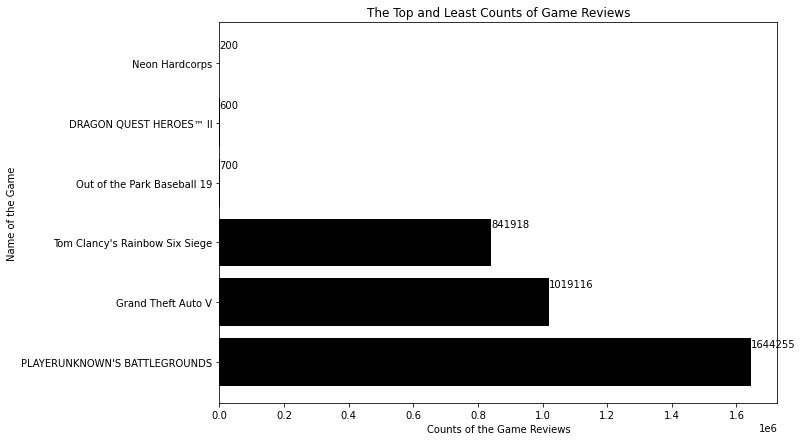

In [78]:
# Creating pandas series that contains the top and least 3 games name and the corresponding review counts.
games = extract_top_last_3(df_reviews.app_name.value_counts())

# Specify the arguments of matplotlib barh function.
locations = np.arange(len(games))
heights = list(games)
labels = games.index

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.barh(locations, heights, tick_label=labels, color='k')
ax1.set_title("The Top and Least Counts of Game Reviews")
ax1.set_ylabel("Name of the Game")
ax1.set_xlabel("Counts of the Game Reviews");

# To print each value alongside with its bar.
for i, v in enumerate(heights):
    ax1.text(v + 3, i + .25, str(v), color='k')

Let's make a quick analysis about the used languages for the reviews in our dataset.

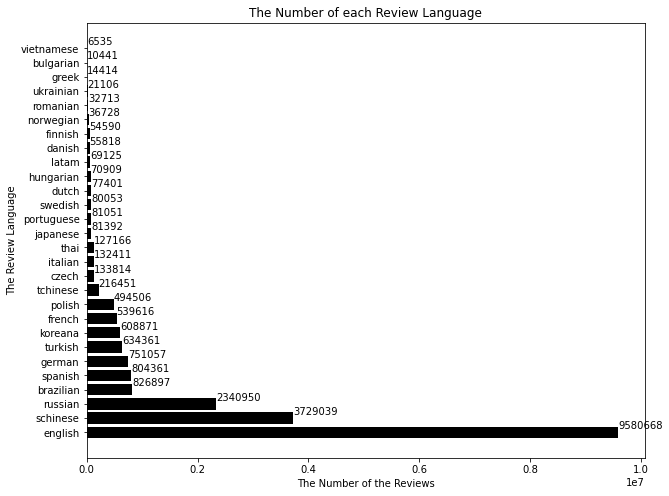

In [93]:
# Creating pandas series that contains the top and least 3 games name and the corresponding review counts.
games = df_reviews.language.value_counts()

# Specify the arguments of matplotlib barh function.
locations = np.arange(len(games))
heights = list(games)
labels = games.index

f = plt.figure(figsize=(10, 8))

ax1 = f.add_subplot(1, 1, 1)
ax1.barh(locations, heights, tick_label=labels, color='k')
ax1.set_title("The Number of each Review Language")
ax1.set_ylabel("The Review Language")
ax1.set_xlabel("The Number of the Reviews");

# To print each value alongside with its bar.
for i, v in enumerate(heights):
    ax1.text(v + 3, i + .25, str(v), color='k')

Any other charactristics are already described in the Data Wrangling part during Assessing and Cleaning the Data.

### RQ3
[**RQ3**] *Now it's important to understand the preferred time to do reviews.*
- What is the most common time that authors review an application? For example, authors usually write a review at 17:44.
- Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
- Use the function that you created in the previous literal to plot the number of reviews between the following time intervals: 
    
| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|

Creating a new df that includes only the attributes that we are interested in.

In [4]:
review_date = df_reviews[['review_id', 'timestamp_created']].copy()

In [5]:
review_date.head()

,review_id,timestamp_created
0,85185598,2021-01-23 06:00:29
1,85185250,2021-01-23 05:50:30
2,85185111,2021-01-23 05:46:40
3,85184605,2021-01-23 05:32:50
4,85184287,2021-01-23 05:23:47


Getting rid of the date in the datetime attribute since we are interested only in hours, minutes, and seconds.

In [6]:
review_date['time_created'] = review_date.timestamp_created.dt.time

In [7]:
display(review_date.head(2))
review_date.tail(2)

,review_id,timestamp_created,time_created
0,85185598,2021-01-23 06:00:29,06:00:29
1,85185250,2021-01-23 05:50:30,05:50:30


,review_id,timestamp_created,time_created
21612442,65645066,2020-03-23 18:03:51,18:03:51
21612443,65644930,2020-03-23 18:01:45,18:01:45


In [8]:
review_date.drop(columns='timestamp_created', inplace=True)

In [9]:
review_date_count = review_date.groupby('time_created').count()
display(review_date_count.head(3))
review_date_count.tail(3)

,review_id
time_created,
00:00:00,193
00:00:01,222
00:00:02,196


,review_id
time_created,
23:59:57,179
23:59:58,244
23:59:59,212


Making sure that we don't have any missing values in the interval of a full day!

In [10]:
day_range = pd.date_range(start=str(review_date_count.index[0]), 
                          end=str(review_date_count.index[-1]), 
                          freq='S').time
day_range

array([datetime.time(0, 0), datetime.time(0, 0, 1),
       datetime.time(0, 0, 2), ..., datetime.time(23, 59, 57),
       datetime.time(23, 59, 58), datetime.time(23, 59, 59)], dtype=object)

In [11]:
(day_range != review_date_count.index).sum()

0

Great! Our dataset now includes a value for each second of an entire day, 24 hours.

1. What is the most common time that authors review an application?

In [12]:
review_date_count.max()

review_id    571
dtype: int64

In [13]:
most_common_time = review_date_count.loc[review_date_count['review_id'] == review_date_count.max()[0]]
most_common_time

,review_id
time_created,
15:54:53,571


Authors usually write a review at 15:54:53.

2. Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

In [89]:
def plot_reviews_num(review_date_count, time_intervals):
    review_date_count = review_date_count.reset_index()
    
    interval_labels = []
    intervals_counts = []
    
    for idx, (init_time, final_time) in enumerate(time_intervals):
        init_time = datetime.strptime(init_time, '%H:%M:%S').time()
        final_time = datetime.strptime(final_time, '%H:%M:%S').time()
        
        interval_labels.append('{}#: {} - {}'.format(idx, init_time, final_time))
        
        counts = review_date_count.query("@init_time <= time_created <= @final_time").review_id.sum()
        intervals_counts.append(counts)
    
    locations = np.arange(len(intervals_counts)) 
    
    
    f = plt.figure(figsize=(20, 7))

    ax1 = f.add_subplot(1, 1, 1)
    ax1.bar(locations, intervals_counts, tick_label=interval_labels, color='k')
    ax1.set_title("Number of Reviews for Each Interval")
    ax1.set_xlabel("Time Intervals")
    ax1.set_ylabel("Number of Reviews");

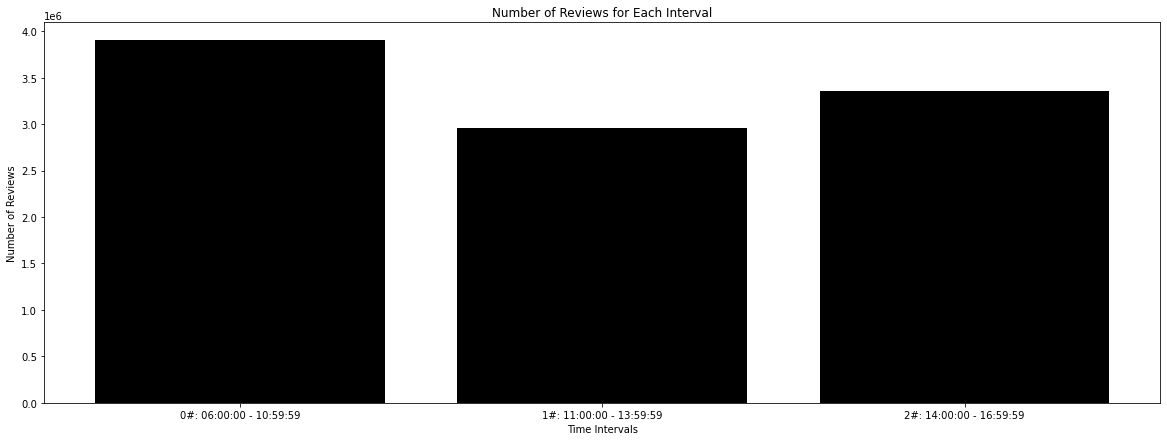

In [90]:
plot_reviews_num(review_date_count, 
                 [('06:00:00', '10:59:59'), 
                  ('11:00:00', '13:59:59'), 
                  ('14:00:00', '16:59:59')])

3. Use the function that you created in the previous literal to plot the number of reviews between the following time intervals: 
    
| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|

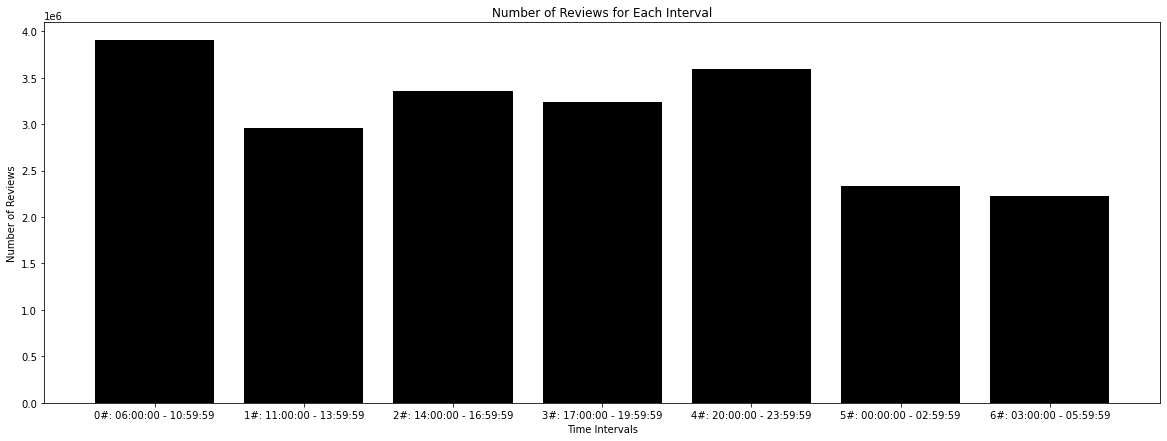

In [91]:
plot_reviews_num(review_date_count, 
                 [('06:00:00', '10:59:59'), 
                  ('11:00:00', '13:59:59'), 
                  ('14:00:00', '16:59:59'), 
                  ('17:00:00', '19:59:59'), 
                  ('20:00:00', '23:59:59'), 
                  ('00:00:00', '02:59:59'), 
                  ('03:00:00', '05:59:59')])

### RQ7
[**RQ7**] *Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.*
- What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?
- What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?
- Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

1. What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [17]:
df_reviews.query('weighted_vote_score >= 0.5').head(2)

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
23,292030,The Witcher 3: Wild Hunt,85178836,schinese,2021-01-23 02:55:35,2021-01-23 02:55:35,True,1,0,0.523810,0,True,False,False
27,292030,The Witcher 3: Wild Hunt,85177648,schinese,2021-01-23 02:25:30,2021-01-23 05:24:55,True,39,0,0.784226,0,True,False,False


In [24]:
n_vote_score_larger_05 = df_reviews.query('weighted_vote_score >= 0.5').weighted_vote_score.count()

prob_score_larger = (n_vote_score_larger_05/len(df_reviews))*100

print("The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is {:.2f}%". 
      format(prob_score_larger))

The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is 22.02%


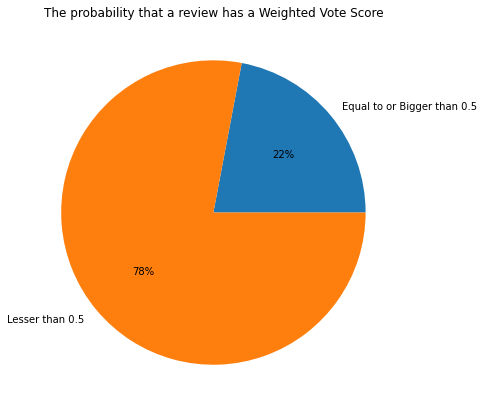

In [19]:
vote_score_series = pd.Series(data=[n_vote_score_larger_05, 
                                    len(df_reviews)-n_vote_score_larger_05], 
                              index=['Equal to or Bigger than 0.5', 
                                     'Lesser than 0.5'])

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.pie(vote_score_series, labels=vote_score_series.index, autopct='%1.0f%%')
ax1.set_title("The probability that a review has a Weighted Vote Score");

2. What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [20]:
df_reviews.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access'],
      dtype='object')

In [21]:
df_reviews.query('votes_funny >= 1').query('weighted_vote_score > 0.5').head(2)

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
64,292030,The Witcher 3: Wild Hunt,85167937,schinese,2021-01-22 22:16:15,2021-01-22 22:16:15,True,1,1,0.521739,0,True,False,False
71,292030,The Witcher 3: Wild Hunt,85166822,turkish,2021-01-22 21:49:29,2021-01-22 21:49:29,True,0,1,0.523810,0,True,False,False


In [38]:
n_votes_funny_larger_1 = df_reviews.query('weighted_vote_score > 0.5')
n_vote_score_funny = n_votes_funny_larger_1.query('votes_funny >= 1').weighted_vote_score.count()

prob_funny_given_score = (n_vote_score_funny/len(df_reviews))*100

print("The probability that a review has at least one vote as " \
      "funny given that the Weighted Vote Score is bigger than 0.5 is {:.2f}%". 
      format(prob_funny_given_score))

The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is 5.35%


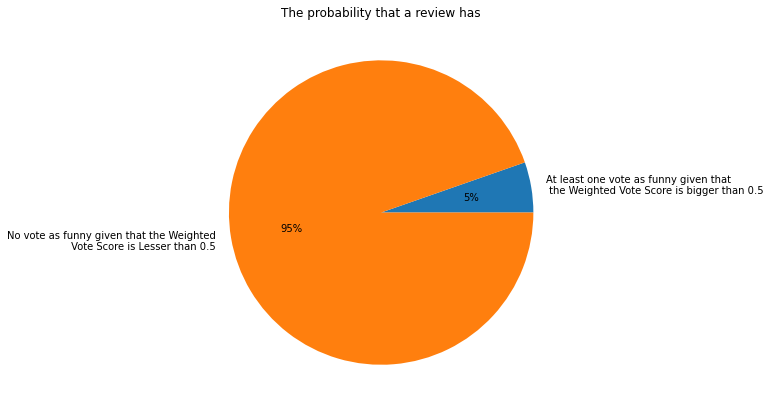

In [23]:
vote_score_funny_series = pd.Series(data=[n_vote_score_funny, 
                                    len(df_reviews)-n_vote_score_funny], 
                              index=['At least one vote as funny given that\n the Weighted Vote Score is bigger than 0.5', 
                                     'No vote as funny given that the Weighted\n Vote Score is Lesser than 0.5'])

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.pie(vote_score_funny_series, labels=vote_score_funny_series.index, autopct='%1.0f%%')
ax1.set_title("The probability that a review has");

3. Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

We check the probability of “a review has at least one vote as funny” multiplied by the probability of “probability that a review has a Weighted Vote Score equal or bigger than 0.5”. If the output equals the probability of the intersection, then they are independent on each other. If not, then they are dependent.

The probability of the intersection is the porobability of one given the other multiplied by the probability of the other. 
- `P(A intersect B) = P(A | B) * P(B)`

In [28]:
n_vote_funny = n_votes_funny_larger_1.weighted_vote_score.count()
prob_funny_larger = (n_vote_funny/len(df_reviews))*100

In [50]:
intersection_prob = ((prob_funny_given_score/100)*(prob_score_larger/100))*100
intersection_prob

1.1773847459495979

- A: The probability of a review that has at least one vote as funny is `11.99%`
- B: The probability of a review that has a Weighted Vote Score equal or bigger than 0.5 is `22.02%`
- P(A intersect B): The probability of the intersection is `1.17%`

In [52]:
((prob_funny_larger/100)*(prob_score_larger/100))*100

2.6406143937583417

- P(A intersect B) = `1.17%`
- P(A) * P(B) = `2.64%`

So, they are dependent on each other.

TQ1

RQ8